In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
pieman_db = niidb.FMriActivationsDb('data/new_pieman.db', mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(pieman_db.all(), mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

12/12/2018 22:45:58 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-19-task-intact2.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
12/12/2018 22:46:02 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-70-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
12/12/2018 22:46:07 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-72-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
12/12/2018 22:46:12 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
12/12/2018 22:46:16 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
12/12

In [6]:
dtfa.normalize_activations()

[tensor(12.2934),
 tensor(9.2157),
 tensor(12.6739),
 tensor(9.9904),
 tensor(7.0961),
 tensor(9.9361),
 tensor(10.2605),
 tensor(10.2784),
 tensor(8.7215),
 tensor(7.7147),
 tensor(10.8663),
 tensor(10.3052),
 tensor(11.3599),
 tensor(11.0267),
 tensor(12.6463),
 tensor(7.3090),
 tensor(12.5919),
 tensor(8.4995),
 tensor(7.3259),
 tensor(12.3034),
 tensor(10.2214),
 tensor(9.0622),
 tensor(10.5355),
 tensor(6.8231),
 tensor(13.3428),
 tensor(11.3538),
 tensor(8.8231),
 tensor(9.5122),
 tensor(8.5310),
 tensor(5.8815),
 tensor(10.5644),
 tensor(9.7792),
 tensor(9.2753),
 tensor(10.2214),
 tensor(15.1439),
 tensor(8.0696),
 tensor(7.7713),
 tensor(9.9900),
 tensor(7.6350),
 tensor(8.9078),
 tensor(12.6764),
 tensor(7.4619),
 tensor(15.6173),
 tensor(12.5026),
 tensor(10.3105),
 tensor(10.8251),
 tensor(8.2151),
 tensor(11.1989),
 tensor(11.2216),
 tensor(13.6012),
 tensor(10.7603),
 tensor(10.0913),
 tensor(9.5122),
 tensor(8.6011),
 tensor(6.8498),
 tensor(8.6109),
 tensor(8.9906),
 te

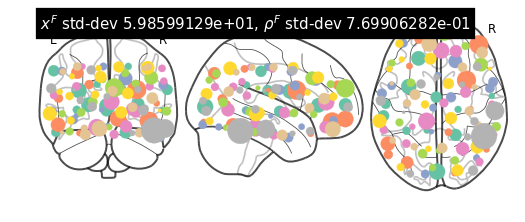

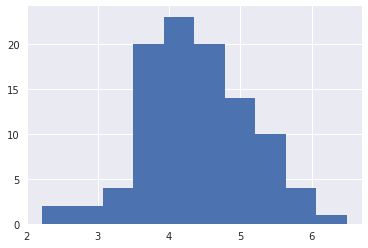

(<nilearn.plotting.displays.OrthoProjector at 0x7f1660165748>,
 tensor([[ -2.0516,  -8.9422,  -1.2609],
         [ -1.0968, -87.3148,   3.6187],
         [-33.1994, -44.3660,  -0.2381],
         [ 62.1144, -21.4483,  20.8640],
         [-20.5945,  31.8599,   5.0799],
         [ 31.1544,  60.2816,   5.6689],
         [ 18.3782, -48.6933, -24.0355],
         [-30.9350,   2.1601,  19.9940],
         [-11.6922, -43.6788,  26.4756],
         [-57.4106, -28.5761,  40.8347],
         [ 21.0204, -21.8765,  45.4108],
         [-55.0724, -16.3101, -23.7123],
         [ 56.4473,  -7.6923,  -0.7735],
         [ 50.8800, -63.8706,   6.5807],
         [ 29.8539,   8.8941,  20.9577],
         [-20.1104,  51.9637,  26.3034],
         [ 42.9208,  46.3488, -12.2444],
         [ 10.2473,  60.1288,  -9.3663],
         [-32.5901, -77.6727,  38.7439],
         [-52.8604, -57.9520, -15.9828],
         [ 10.9616, -45.8535,  43.4305],
         [-30.1620,  23.7520, -24.7169],
         [ 34.5565, -20.6929,  21.0

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=2000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=8, patience=100)

12/12/2018 22:56:26 [Epoch 1] (44404ms) Posterior free-energy 6.13580416e+08 = KL from prior 3.83829614e+03 - log-likelihood -6.13576576e+08
12/12/2018 22:56:26 Saving checkpoint...
12/12/2018 22:57:11 [Epoch 2] (44033ms) Posterior free-energy 5.80618176e+08 = KL from prior 4.97636816e+03 - log-likelihood -5.80613120e+08
12/12/2018 22:57:55 [Epoch 3] (44114ms) Posterior free-energy 5.62084480e+08 = KL from prior 8.54778516e+03 - log-likelihood -5.62075968e+08
12/12/2018 22:58:39 [Epoch 4] (44075ms) Posterior free-energy 5.51367808e+08 = KL from prior 1.26402129e+04 - log-likelihood -5.51355200e+08
12/12/2018 22:59:23 [Epoch 5] (44188ms) Posterior free-energy 5.44468928e+08 = KL from prior 1.73448594e+04 - log-likelihood -5.44451584e+08
12/12/2018 23:00:07 [Epoch 6] (44167ms) Posterior free-energy 5.39803456e+08 = KL from prior 2.24085234e+04 - log-likelihood -5.39780992e+08
12/12/2018 23:00:51 [Epoch 7] (44209ms) Posterior free-energy 5.36599840e+08 = KL from prior 2.78629980e+04 - log

Epoch  1811: reducing learning rate of group 0 to 5.0000e-03.
Epoch  1811: reducing learning rate of group 1 to 5.0000e-04.


12/13/2018 21:18:21 [Epoch 1813] (44318ms) Posterior free-energy 3.94839520e+08 = KL from prior 2.03594750e+06 - log-likelihood -3.92803552e+08
12/13/2018 21:19:06 [Epoch 1814] (44319ms) Posterior free-energy 3.94060352e+08 = KL from prior 2.03333638e+06 - log-likelihood -3.92027072e+08
12/13/2018 21:19:50 [Epoch 1815] (44276ms) Posterior free-energy 3.93898368e+08 = KL from prior 2.03306775e+06 - log-likelihood -3.91865280e+08
12/13/2018 21:20:34 [Epoch 1816] (44262ms) Posterior free-energy 3.93865760e+08 = KL from prior 2.03312075e+06 - log-likelihood -3.91832640e+08
12/13/2018 21:21:19 [Epoch 1817] (44335ms) Posterior free-energy 3.93853760e+08 = KL from prior 2.03291162e+06 - log-likelihood -3.91820864e+08
12/13/2018 21:22:03 [Epoch 1818] (44368ms) Posterior free-energy 3.93846880e+08 = KL from prior 2.03263950e+06 - log-likelihood -3.91814208e+08
12/13/2018 21:22:47 [Epoch 1819] (44381ms) Posterior free-energy 3.93842112e+08 = KL from prior 2.03299150e+06 - log-likelihood -3.91809

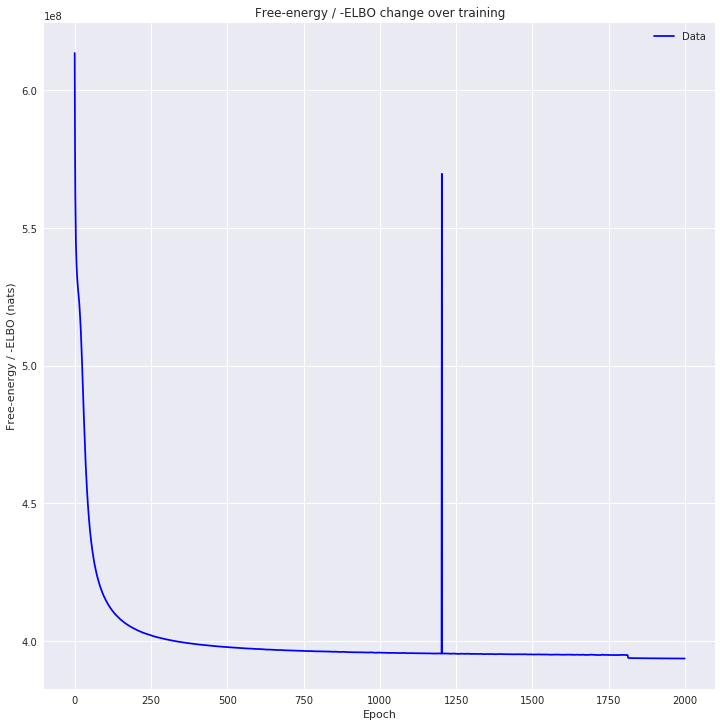

In [9]:
utils.plot_losses(losses)

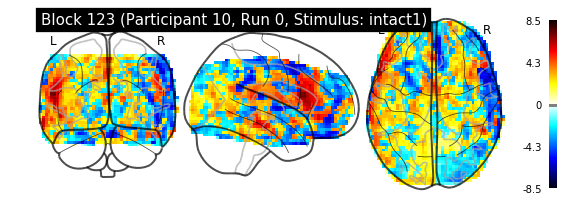

12/13/2018 23:36:37 Reconstruction Error (Frobenius Norm): 3.42898511e+03 out of 4.29069873e+03


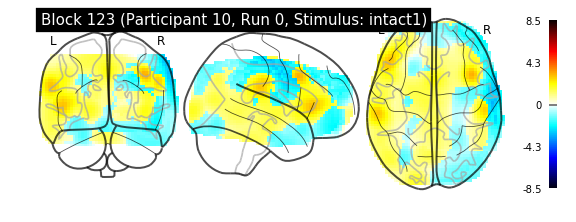

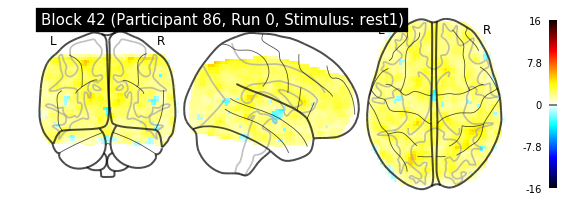

12/13/2018 23:37:00 Reconstruction Error (Frobenius Norm): 3.26816162e+03 out of 4.95447168e+03


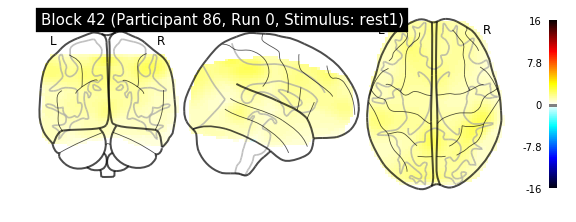

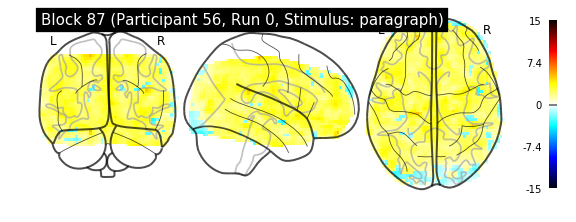

12/13/2018 23:37:18 Reconstruction Error (Frobenius Norm): 2.91770703e+03 out of 4.29069922e+03


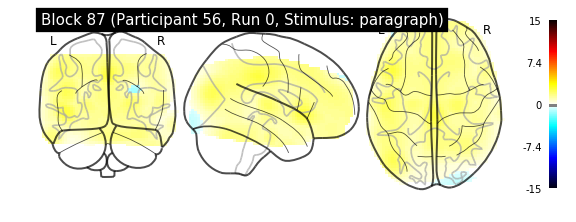

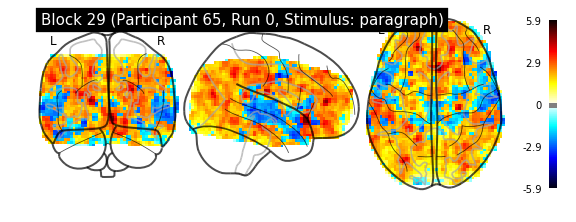

12/13/2018 23:37:36 Reconstruction Error (Frobenius Norm): 3.34611987e+03 out of 4.29069873e+03


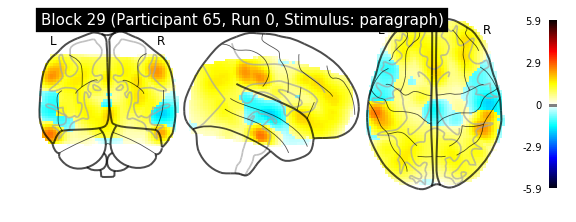

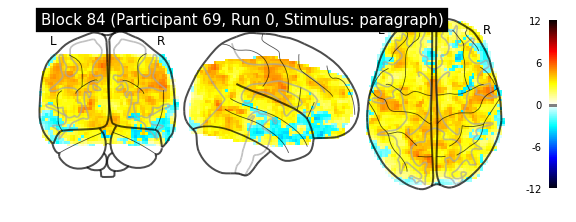

12/13/2018 23:37:53 Reconstruction Error (Frobenius Norm): 3.20809888e+03 out of 4.29069873e+03


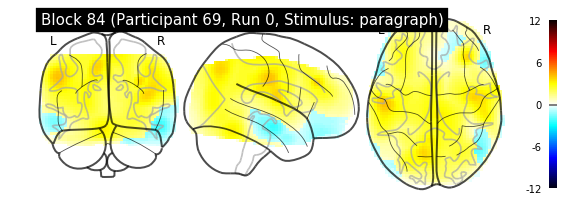

In [10]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [11]:
def task_labeler(b):
    return b.task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


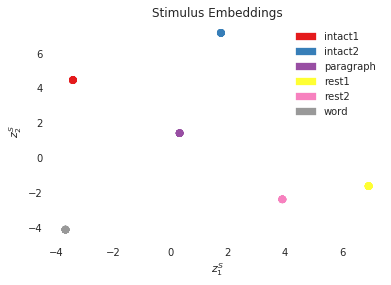

In [12]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [13]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


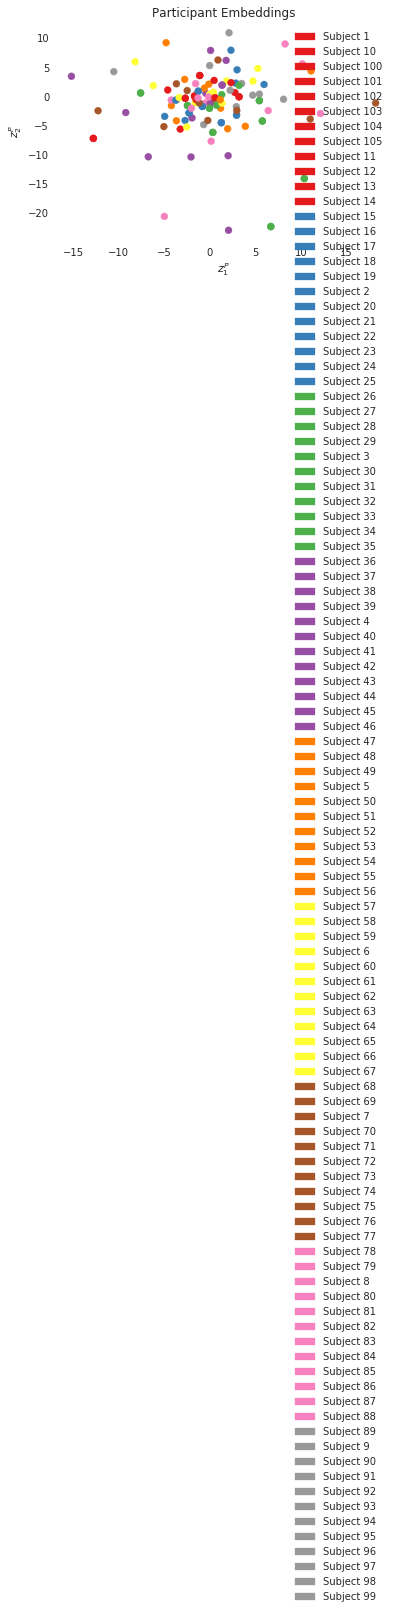

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

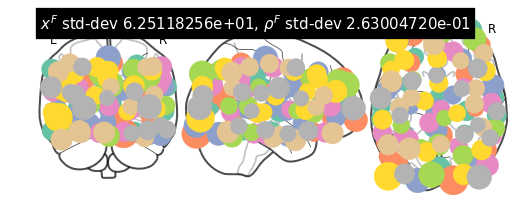

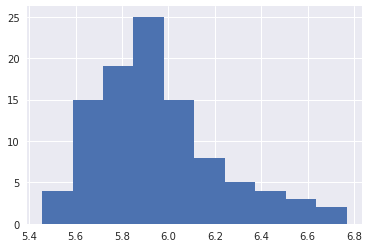

(<nilearn.plotting.displays.OrthoProjector at 0x7f10a4483550>,
 tensor([[ -0.1801,  -7.1822,  -3.3735],
         [  0.3717, -85.3310,   7.2179],
         [-33.7412, -47.4614,   1.6399],
         [ 61.6912, -28.0101,  24.2400],
         [-24.2076,  33.4748,   6.2533],
         [ 34.4739,  61.6470,   6.9185],
         [ 27.6667, -47.4171, -22.3846],
         [-30.3945,   4.7639,  23.6469],
         [ -6.1762, -41.9998,  30.3117],
         [-59.3629, -31.5525,  42.3730],
         [ 30.0097, -23.4560,  47.1456],
         [-59.6633, -17.5204, -22.2154],
         [ 58.7380,  -9.1790,  -1.6991],
         [ 52.0364, -64.5985,   7.9499],
         [ 28.0131,  15.2248,  22.6775],
         [-26.8618,  57.4833,  32.3430],
         [ 44.6702,  45.8191,  -7.3013],
         [  8.9717,  71.1845, -10.3646],
         [-42.7513, -79.6524,  37.5337],
         [-55.8134, -57.1454,  -9.9104],
         [  3.8785, -49.1891,  48.9332],
         [-28.7840,  27.1532, -23.1599],
         [ 39.3289, -20.6740,  18.5

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
dtfa.average_reconstruction_error()

12/14/2018 14:21:16 Average reconstruction error (MSE): 7.26006044e-01
12/14/2018 14:21:16 Average data norm (Euclidean): 1.00000002e+00
12/14/2018 14:21:16 Percent average reconstruction error: 0.305693


(0.7260060441642473, 1.0000000249786931, 0.003056932903248188)